In [1]:
#The displacement field is converted between two sampling grid.
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter
from mpl_toolkits.axes_grid1 import AxesGrid

In [5]:
disp_field = np.zeros((512, 512), np.float32)

Text(0.5, 1.0, 'displacement field')

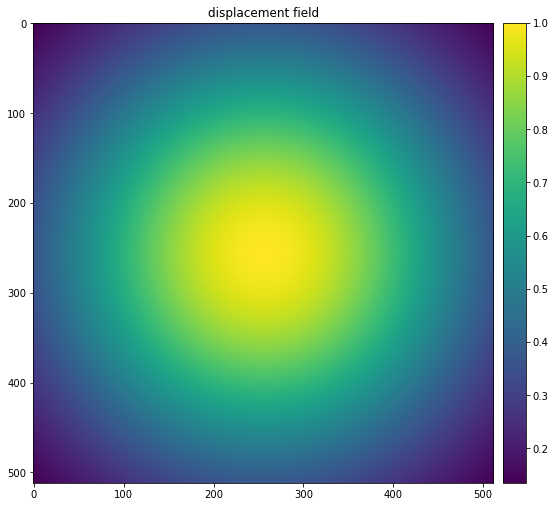

In [10]:
#initialize a displacement field along the horizontal direction
#the displacement field is a Gaussian curve.
Y, X = np.indices(disp_field.shape)/256
disp_field = np.exp(-(X -1.0)*(X - 1.0)-(Y - 1.0)*(Y - 1.0))
fig =plt.figure(1, figsize=(30, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(disp_field, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("displacement field")

Text(0.5, 1.0, 'displacement field')

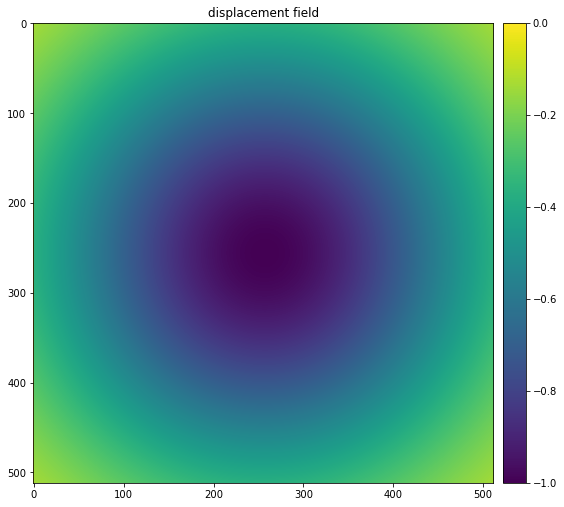

In [22]:
#let's make the transformation using the griddata.
#A(x) = B(x+dx), x is integer pixel index.
#in the sampling grid of signal A, the displacement of each pixel is dx. 
#we want to solve the displacement values in the sampling grid of B.
#B(x) = A(x+dx')
#what is the dx'
Y, X = np.indices(disp_field.shape)
new_x = X + disp_field
new_disp_field = griddata((new_x.flatten(),Y.flatten()),-disp_field.flatten(),(X.flatten(),Y.flatten()), method='cubic')
new_disp_field = np.reshape(new_disp_field, disp_field.shape)
new_disp_field[np.where(np.isnan(new_disp_field))] = 0
#plot the new displacement field.
fig =plt.figure(1, figsize=(30, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(new_disp_field, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("displacement field")

In [23]:
np.unravel_index(disp_field.argmax(), disp_field.shape)

(256, 256)

In [24]:
np.unravel_index(new_disp_field.argmin(), new_disp_field.shape)

(256, 257)